In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [36]:
dataset = pd.read_csv('sphere-sample-data.csv')
print(dataset.shape)
dataset.head()

(5490, 8)


,date,source,attributed_conversions,attributed_revenue,type,spends,partition_id,optimisation_target
0,2022-06-01,affiliate_prospecting,9.773536,1063.864402,incrementality,98.537499,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
1,2022-06-01,affiliate_prospecting,9.171868,998.371874,incrementality,98.537499,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
2,2022-06-01,baseline,75.074214,8171.943281,baseline,NaN,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
3,2022-06-01,baseline,9.778579,1064.413270,baseline,NaN,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
4,2022-06-01,direct,5.215478,567.712733,baseline,NaN,932561105d21a54d3d1d2a941164ffec321cd76b,conversions


In [37]:
dataset.date.unique()

array(['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04',
       '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
       '2022-06-09', '2022-06-10', '2022-06-11', '2022-06-12',
       '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
       '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20',
       '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
       '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
       '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02',
       '2022-07-03', '2022-07-04', '2022-07-05', '2022-07-06',
       '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10',
       '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
       '2022-07-15', '2022-07-16', '2022-07-17', '2022-07-18',
       '2022-07-19', '2022-07-20', '2022-07-21', '2022-07-22',
       '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26',
       '2022-07-27', '2022-07-28', '2022-07-29', '2022-07-30',
       '2022-07-31', '2022-08-01', '2022-08-02', '2022-

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    5490 non-null   object 
 1   source                  5490 non-null   object 
 2   attributed_conversions  5490 non-null   float64
 3   attributed_revenue      5490 non-null   float64
 4   type                    5490 non-null   object 
 5   spends                  4026 non-null   float64
 6   partition_id            5490 non-null   object 
 7   optimisation_target     5490 non-null   object 
dtypes: float64(3), object(5)
memory usage: 343.3+ KB


In [39]:
dataset.describe()

,attributed_conversions,attributed_revenue,spends
count,5490.000000,5490.000000,4026.000000
mean,15.206193,1729.226703,427.227415
std,31.483883,4185.848448,724.999122
min,0.000000,0.000000,0.000000
25%,1.116649,122.442148,50.790000
50%,4.682459,510.589653,125.880000
75%,16.124381,1781.365872,493.305931
max,1122.621521,185574.418259,8304.291182


In [40]:
# dataset['date'].dtype=pd.to_datetime(dataset['date'])
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    5490 non-null   datetime64[ns]
 1   source                  5490 non-null   object        
 2   attributed_conversions  5490 non-null   float64       
 3   attributed_revenue      5490 non-null   float64       
 4   type                    5490 non-null   object        
 5   spends                  4026 non-null   float64       
 6   partition_id            5490 non-null   object        
 7   optimisation_target     5490 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 343.3+ KB


In [41]:
dataset.source.unique()

array(['affiliate_prospecting', 'baseline', 'direct',
       'display_prospecting', 'display_retargeting', 'google_performance',
       'organicsearch', 'organicsocial', 'paidsearch_brand',
       'paidsearch_dynamic_search_ads_prospecting',
       'paidsearch_generic_prospecting', 'paidsocial_prospecting',
       'paidsocial_retargeting', 'radio', 'tv'], dtype=object)

In [42]:
dataset.type.unique()

array(['incrementality', 'baseline'], dtype=object)

In [43]:
dataset.optimisation_target.unique()

array(['conversions', 'revenue'], dtype=object)

In [44]:
dataset.partition_id.unique()

array(['932561105d21a54d3d1d2a941164ffec321cd76b'], dtype=object)

In [45]:
dataset.isnull().sum()

date                         0
source                       0
attributed_conversions       0
attributed_revenue           0
type                         0
spends                    1464
partition_id                 0
optimisation_target          0
dtype: int64

In [46]:
dataset["spends"].fillna(0, inplace = True) 
    
dataset.isnull().sum()

date                      0
source                    0
attributed_conversions    0
attributed_revenue        0
type                      0
spends                    0
partition_id              0
optimisation_target       0
dtype: int64

In [47]:
dataset.head()

,date,source,attributed_conversions,attributed_revenue,type,spends,partition_id,optimisation_target
0,2022-06-01,affiliate_prospecting,9.773536,1063.864402,incrementality,98.537499,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
1,2022-06-01,affiliate_prospecting,9.171868,998.371874,incrementality,98.537499,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
2,2022-06-01,baseline,75.074214,8171.943281,baseline,0.000000,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
3,2022-06-01,baseline,9.778579,1064.413270,baseline,0.000000,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
4,2022-06-01,direct,5.215478,567.712733,baseline,0.000000,932561105d21a54d3d1d2a941164ffec321cd76b,conversions


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
sourcewithspends=dataset.groupby('source').spends.agg(lambda x: sum(x))
sourcewithspends


source
affiliate_prospecting                        114594.374908
baseline                                          0.000000
direct                                            0.000000
display_prospecting                           95336.034758
display_retargeting                           40502.059994
google_performance                            18958.611268
organicsearch                                     0.000000
organicsocial                                     0.000000
paidsearch_brand                             372386.819864
paidsearch_dynamic_search_ads_prospecting     50362.180000
paidsearch_generic_prospecting                14617.060000
paidsocial_prospecting                       374314.658244
paidsocial_retargeting                        32313.755508
radio                                         32790.080000
tv                                           573841.939994
Name: spends, dtype: float64

In [50]:
src_spends=dataset.groupby("source",as_index=False).agg(
    spends=pd.NamedAgg(column="spends", aggfunc="sum"))
src_spends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  15 non-null     object 
 1   spends  15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


AttributeError: module 'matplotlib.pyplot' has no attribute 'autofmt_xdate'

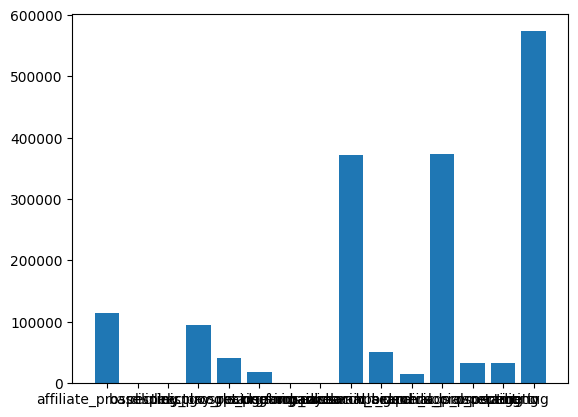

<Figure size 3000x1500 with 0 Axes>

In [34]:
# plt.bar(x='source',y='spends',data=src_spends)
src=src_spends['source']
spends=src_spends['spends']
plt.bar(src,spends)
plt.figure(figsize=(30,15))

plt.tight_layout()
# plt.rcParams['xtick.labelsize'] = small

plt.autofmt_xdate()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   source               30 non-null     object 
 1   optimisation_target  30 non-null     object 
 2   type                 30 non-null     object 
 3   ac                   30 non-null     float64
 4   ar                   30 non-null     float64
 5   spends               30 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.5+ KB


,source,optimisation_target,type,ac,ar,spends
0,affiliate_prospecting,conversions,incrementality,5360.808844,6.834216e+05,57297.187454
1,affiliate_prospecting,revenue,incrementality,5089.822236,5.345667e+05,57297.187454
2,baseline,conversions,baseline,22545.831379,2.372242e+06,0.000000
3,baseline,revenue,baseline,2941.756753,6.249290e+05,0.000000
4,direct,conversions,baseline,1842.514782,2.153961e+05,0.000000
5,direct,revenue,baseline,7869.176599,8.419209e+05,0.000000
6,display_prospecting,conversions,incrementality,624.816943,9.041384e+04,47668.017379
7,display_prospecting,revenue,incrementality,1171.866701,1.220498e+05,47668.017379
8,display_retargeting,conversions,incrementality,653.145455,8.174142e+04,20251.029997
9,display_retargeting,revenue,incrementality,261.840973,2.697564e+04,20251.029997


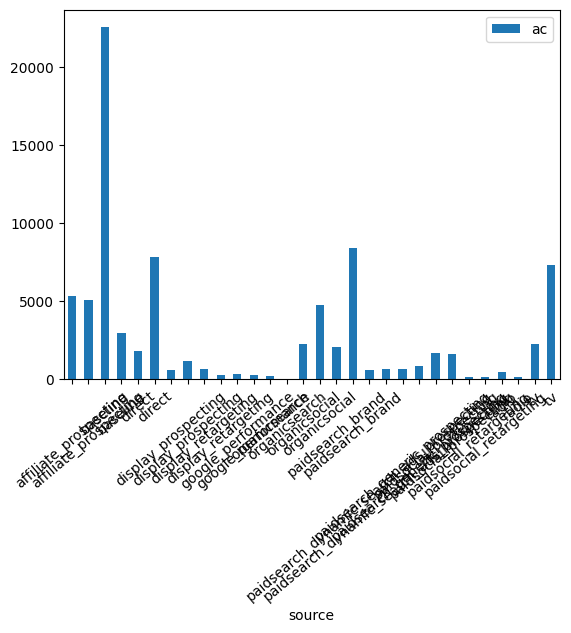

In [74]:
src_revenue=dataset.groupby(["source",'optimisation_target','type'],as_index=False).agg(
    ac=pd.NamedAgg(column="attributed_conversions", aggfunc="sum"),
    ar=pd.NamedAgg(column="attributed_revenue", aggfunc="sum"),
    spends=pd.NamedAgg(column="spends", aggfunc="sum"))
src_revenue.info()

src_revenue.plot.bar(x = 'source', y = ['ac'], rot = 40)
src_revenue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    2 non-null      object 
 1   ac      2 non-null      float64
 2   ar      2 non-null      float64
 3   spends  2 non-null      float64
dtypes: float64(3), object(1)
memory usage: 196.0+ bytes


,type,ac,ar,spends
0,baseline,53016.735802,6.005324e+06,3.723868e+05
1,incrementality,30465.264198,3.488131e+06,1.347631e+06


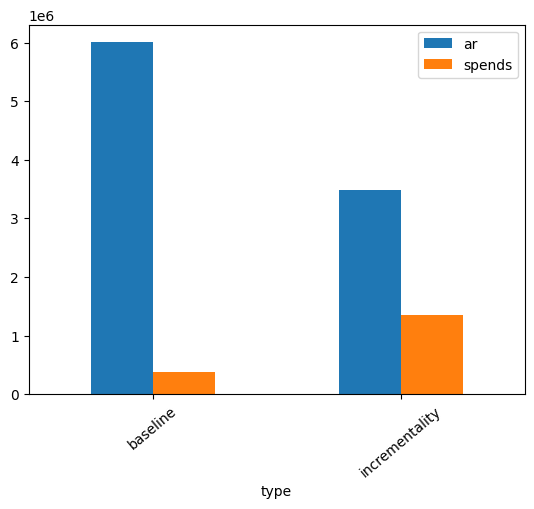

In [53]:
type_revenue=dataset.groupby(['type'],as_index=False).agg(
    ac=pd.NamedAgg(column="attributed_conversions", aggfunc="sum"),
    ar=pd.NamedAgg(column="attributed_revenue", aggfunc="sum"),
    spends=pd.NamedAgg(column="spends", aggfunc="sum"))
type_revenue.info()

type_revenue.plot.bar(x = 'type', y = ['ar','spends'], rot = 40)
type_revenue

In [54]:
src=dataset.groupby(["source"],as_index=False).agg(
    attributed_conversions=pd.NamedAgg(column="attributed_conversions", aggfunc="sum"),
    attributed_revenue=pd.NamedAgg(column="attributed_revenue", aggfunc="sum"),
    spends=pd.NamedAgg(column="spends", aggfunc="sum"))
src.info()

# src_revenue.plot.bar(x = 'source', y = ['ac'], rot = 40)
src

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   source                  15 non-null     object 
 1   attributed_conversions  15 non-null     float64
 2   attributed_revenue      15 non-null     float64
 3   spends                  15 non-null     float64
dtypes: float64(3), object(1)
memory usage: 612.0+ bytes


,source,attributed_conversions,attributed_revenue,spends
0,affiliate_prospecting,10450.631080,1.217988e+06,114594.374908
1,baseline,25487.588132,2.997171e+06,0.000000
2,direct,9711.691380,1.057317e+06,0.000000
3,display_prospecting,1796.683644,2.124637e+05,95336.034758
4,display_retargeting,914.986428,1.087171e+05,40502.059994
5,google_performance,639.086970,8.047428e+04,18958.611268
6,organicsearch,269.960594,3.173314e+04,0.000000
7,organicsocial,7034.675762,7.799097e+05,0.000000
8,paidsearch_brand,10512.819934,1.139193e+06,372386.819864
9,paidsearch_dynamic_search_ads_prospecting,1303.195514,1.408457e+05,50362.180000


In [55]:
src=dataset.groupby(["source",'date'],as_index=False).agg(
    ar=pd.NamedAgg(column="attributed_revenue", aggfunc="sum"),
    spends=pd.NamedAgg(column="spends", aggfunc="sum"))
src.info()

# src_revenue.plot.bar(x = 'source', y = ['ac'], rot = 40)
src

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  2745 non-null   object        
 1   date    2745 non-null   datetime64[ns]
 2   ar      2745 non-null   float64       
 3   spends  2745 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 85.9+ KB


,source,date,ar,spends
0,affiliate_prospecting,2022-06-01,2062.236276,197.074998
1,affiliate_prospecting,2022-06-02,2167.453431,180.850000
2,affiliate_prospecting,2022-06-03,2134.292278,311.150000
3,affiliate_prospecting,2022-06-04,824.811667,79.025000
4,affiliate_prospecting,2022-06-05,2784.168953,212.275000
...,...,...,...,...
2740,tv,2022-11-26,21550.960962,12494.140000
2741,tv,2022-11-27,30012.650403,14281.600000
2742,tv,2022-11-28,19870.440835,11269.400000
2743,tv,2022-11-29,14150.074033,10571.240000


<Axes: xlabel='source'>

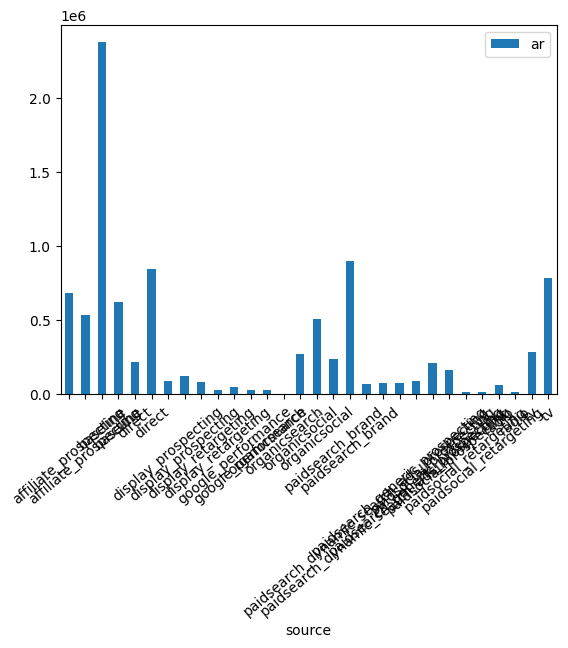

In [56]:
src_revenue.plot.bar(x = 'source', y = ['ar'], rot = 40)

In [57]:
dataset.loc[dataset['source'] == 'baseline']

,date,source,attributed_conversions,attributed_revenue,type,spends,partition_id,optimisation_target
2,2022-06-01,baseline,75.074214,8171.943281,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
3,2022-06-01,baseline,9.778579,1064.413270,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
32,2022-06-02,baseline,86.136271,9157.410555,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
33,2022-06-02,baseline,12.646827,1344.522917,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
62,2022-06-03,baseline,54.631523,5917.192538,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
...,...,...,...,...,...,...,...,...
5403,2022-11-28,baseline,22.247834,20525.473185,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
5432,2022-11-29,baseline,166.242847,21203.063250,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
5433,2022-11-29,baseline,21.852579,2787.137130,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
5462,2022-11-30,baseline,163.483135,16631.473769,baseline,0.0,932561105d21a54d3d1d2a941164ffec321cd76b,conversions


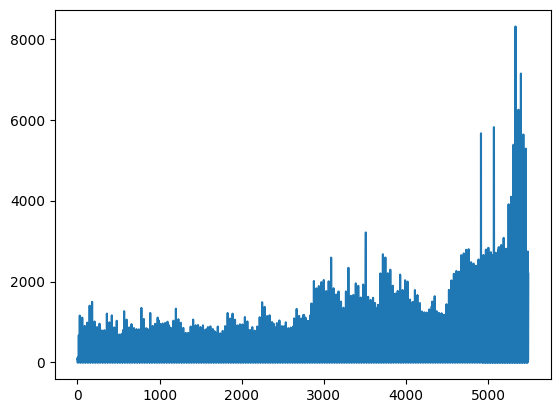

In [58]:
dataset['spends'].plot()
plt.show()

<Figure size 3000x1500 with 0 Axes>

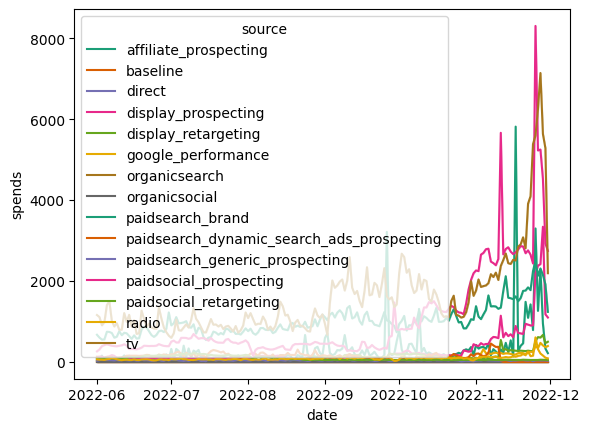

<Figure size 3000x1500 with 0 Axes>

In [59]:
drange = dataset.loc["2022-06": "2022-12"]
sns.lineplot(data = dataset,x='date',y='spends',hue='source',palette="Dark2")
# plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(figsize=(30,15))


/var/folders/gb/xh40190s74v8bcvbf659xnlh0000gn/T/ipykernel_6645/2988729948.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = dataset,x='date',y='attributed_revenue',hue='optimisation_target',palette="Dark2",ci=None)


<Figure size 3000x1500 with 0 Axes>

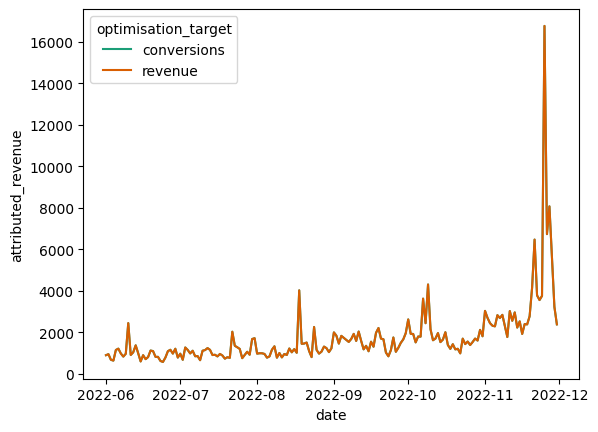

<Figure size 3000x1500 with 0 Axes>

In [60]:
drange = dataset.loc["2022-06": "2022-12"]
sns.lineplot(data = dataset,x='date',y='attributed_revenue',hue='optimisation_target',palette="Dark2",ci=None)
# plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(figsize=(30,15))

/var/folders/gb/xh40190s74v8bcvbf659xnlh0000gn/T/ipykernel_6645/2122584534.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = dataset,x='date',y='spends',palette="Dark2")


<Figure size 3000x1500 with 0 Axes>

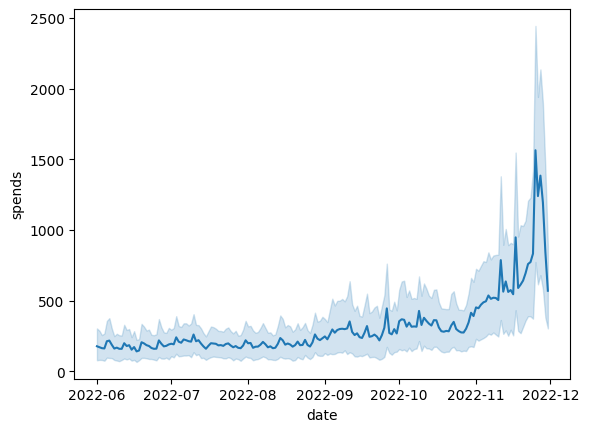

<Figure size 3000x1500 with 0 Axes>

In [61]:
drange = dataset.loc["2022-06": "2022-12"]
sns.lineplot(data = dataset,x='date',y='spends',palette="Dark2")
# plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(figsize=(30,15))

In [62]:
dataset.info()
dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5490 entries, 0 to 5489
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    5490 non-null   datetime64[ns]
 1   source                  5490 non-null   object        
 2   attributed_conversions  5490 non-null   float64       
 3   attributed_revenue      5490 non-null   float64       
 4   type                    5490 non-null   object        
 5   spends                  5490 non-null   float64       
 6   partition_id            5490 non-null   object        
 7   optimisation_target     5490 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 343.3+ KB


,date,source,attributed_conversions,attributed_revenue,type,spends,partition_id,optimisation_target
0,2022-06-01,affiliate_prospecting,9.773536,1063.864402,incrementality,98.537499,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
1,2022-06-01,affiliate_prospecting,9.171868,998.371874,incrementality,98.537499,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
2,2022-06-01,baseline,75.074214,8171.943281,baseline,0.000000,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
3,2022-06-01,baseline,9.778579,1064.413270,baseline,0.000000,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
4,2022-06-01,direct,5.215478,567.712733,baseline,0.000000,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
...,...,...,...,...,...,...,...,...
5485,2022-11-30,paidsocial_retargeting,0.858350,87.321690,incrementality,47.630000,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
5486,2022-11-30,radio,3.493064,355.356550,incrementality,87.810000,932561105d21a54d3d1d2a941164ffec321cd76b,conversions
5487,2022-11-30,radio,0.745845,75.876289,incrementality,87.810000,932561105d21a54d3d1d2a941164ffec321cd76b,revenue
5488,2022-11-30,tv,22.151002,2253.466723,incrementality,2193.120000,932561105d21a54d3d1d2a941164ffec321cd76b,conversions


<Axes: >

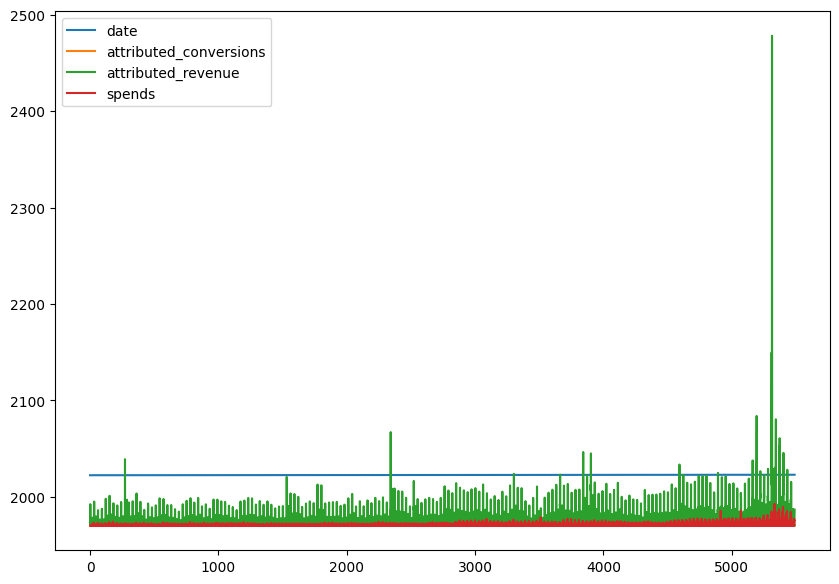

In [63]:
dataset.plot(figsize=(10, 7))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


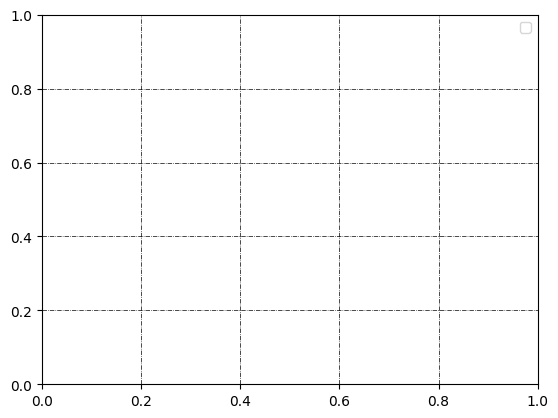

In [64]:
plt.legend()
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

<Axes: xlabel='spends', ylabel='date'>

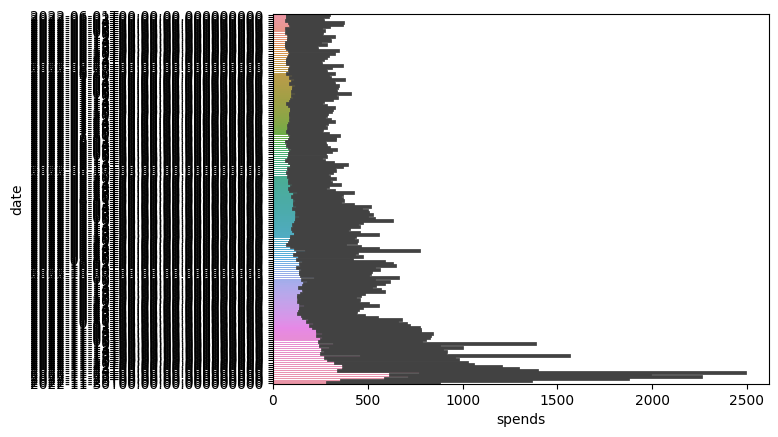

In [65]:
sns.barplot(x='spends',y='date',data=dataset)

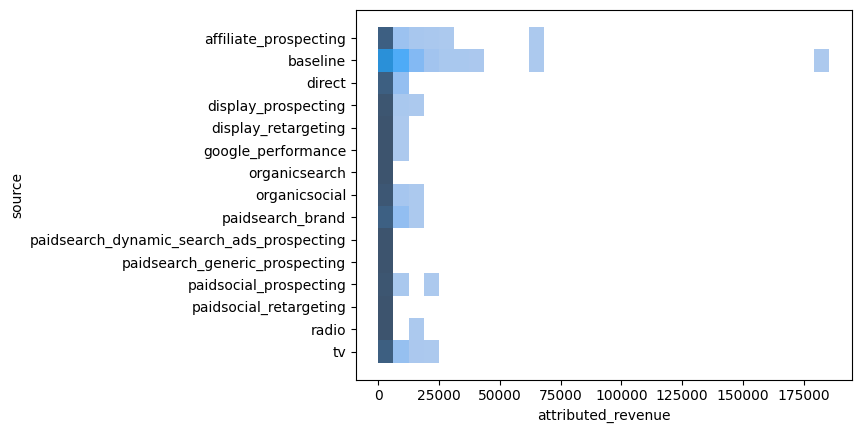

In [66]:
sns.histplot(x='attributed_revenue',y='source', data=dataset,bins=30, )
plt.show()

In [67]:
dataset.groupby('source')['attributed_revenue'].sum()

source
affiliate_prospecting                        1.217988e+06
baseline                                     2.997171e+06
direct                                       1.057317e+06
display_prospecting                          2.124637e+05
display_retargeting                          1.087171e+05
google_performance                           8.047428e+04
organicsearch                                3.173314e+04
organicsocial                                7.799097e+05
paidsearch_brand                             1.139193e+06
paidsearch_dynamic_search_ads_prospecting    1.408457e+05
paidsearch_generic_prospecting               1.684479e+05
paidsocial_prospecting                       3.813725e+05
paidsocial_retargeting                       3.449755e+04
radio                                        7.806651e+04
tv                                           1.065257e+06
Name: attributed_revenue, dtype: float64

In [68]:
dataset.attributed_revenue.max()

185574.41825922392

AttributeError: 'Series' object has no attribute 'bar'

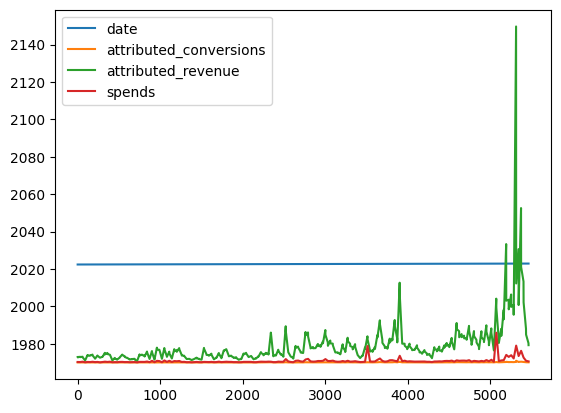

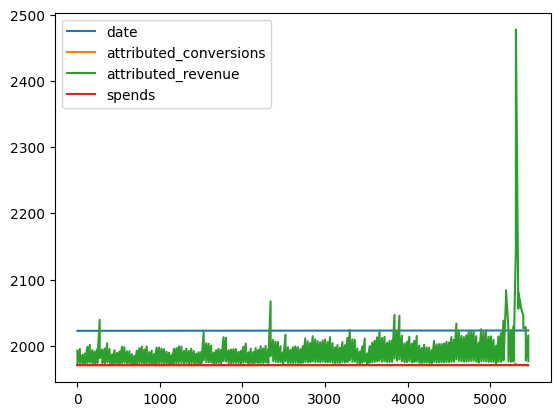

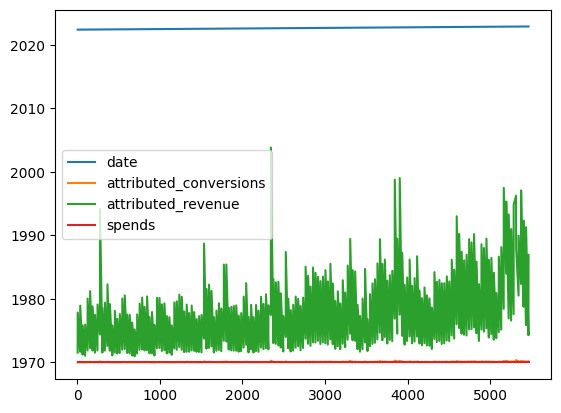

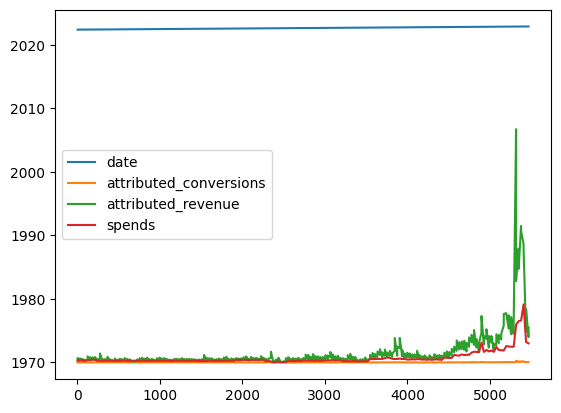

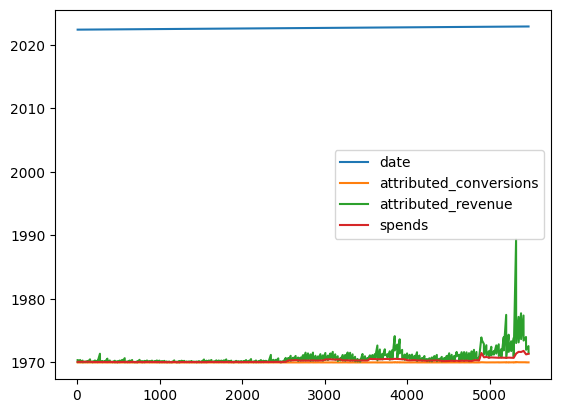

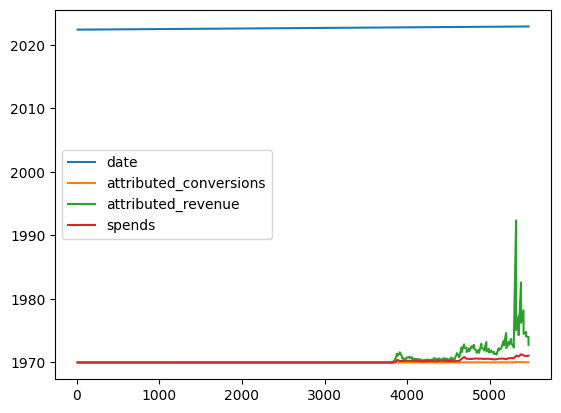

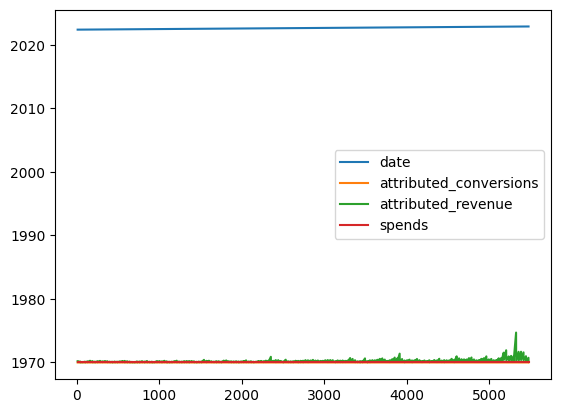

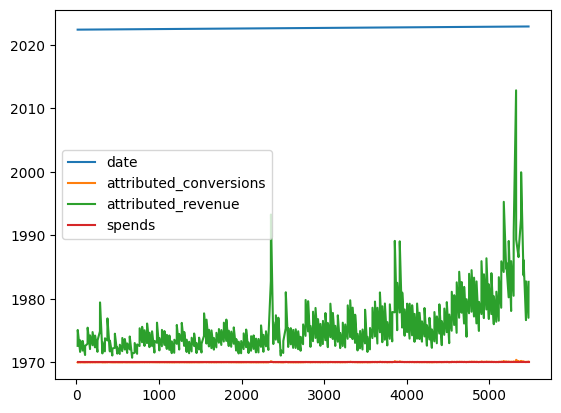

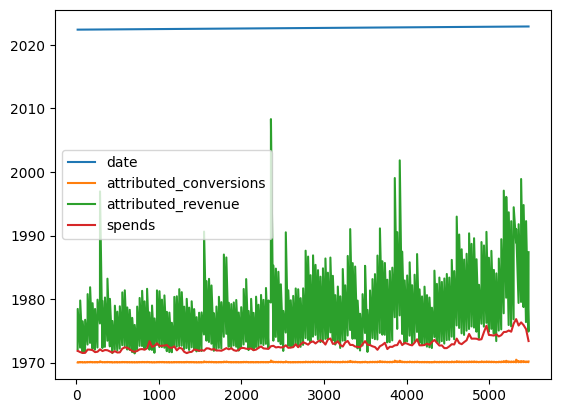

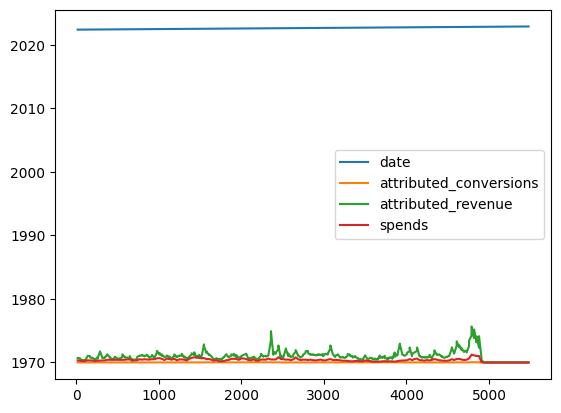

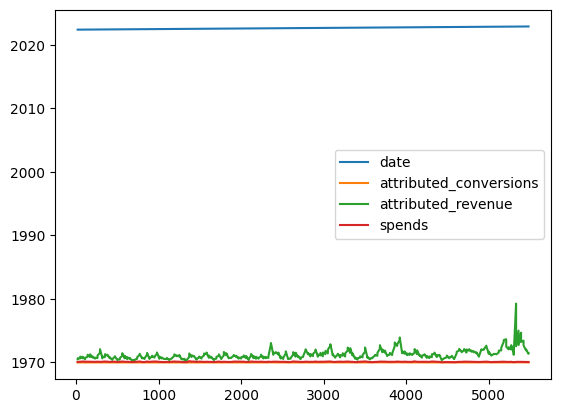

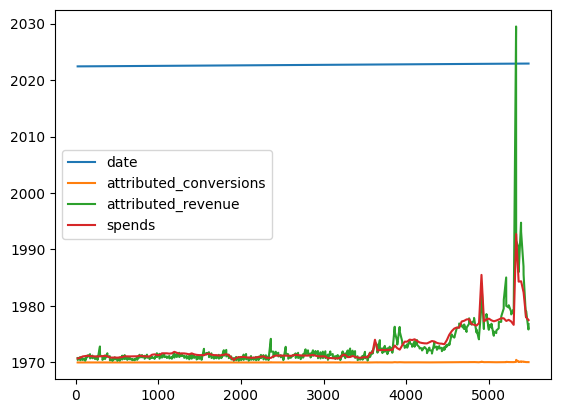

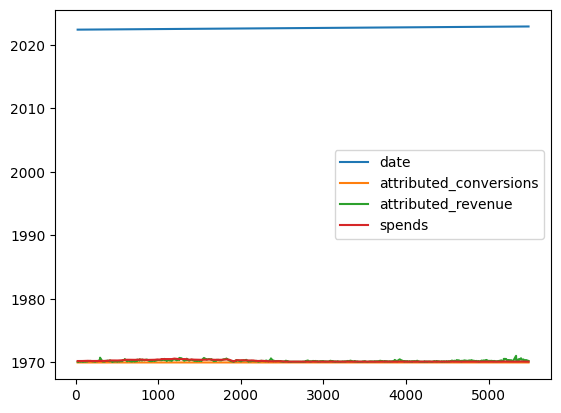

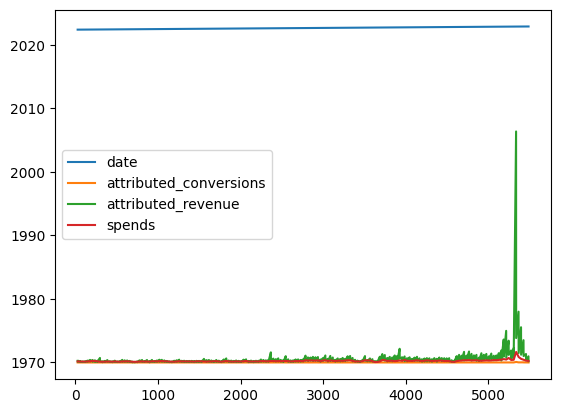

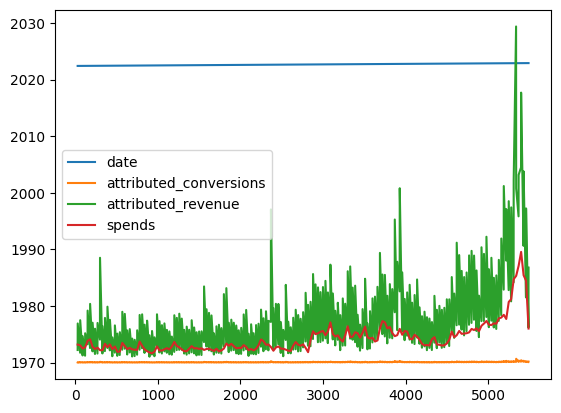

In [69]:
dataset.groupby('source').plot().bar()
plt.show()

In [ ]:
dataset[['attributed_revenue','attributed_conversions','spends']].corr()

In [ ]:
sns.heatmap(dataset[['attributed_revenue','attributed_conversions','spends']].corr(),annot=True,cmap='Reds')
plt.show()